# AI PROJECT

# Define The Problem : About the Dataset

# FACE IMAGE RECOGNITION 


* The dataset consists of images capturing people displaying 7 distinct emotions (anger, contempt, disgust, fear, happiness, sadness and surprise).
* Each image in the dataset represents one of these specific emotions, enabling researchers and machine learning practitioners to study and develop models for emotion recognition and analysis.
* Facial emotion recognition using OpenCV and a CNN (Convolutional Neural Network) model aims to automatically detect and classify human emotions based on facial expressions captured in images or video frames.
*  The primary goal is to develop a system that can accurately interpret and categorize emotional states from facial cues, enabling various applications across industries.
* Here's a detailed description of the components involved, along with the aim and model description:

## Aim:
#### The primary aim of facial emotion recognition using OpenCV and a CNN model is to:

* Enable real-time analysis of human emotions from facial expressions captured through images or video streams.
* Provide a tool for applications such as human-computer interaction, market research, healthcare, and security systems.
* Enhance user experience, improve marketing strategies, aid in emotional therapy, and enhance security measures by understanding and responding to human emotions.

## Model Description:
#### 1. Data Acquisition and Preprocessing:
* Data Collection: Gather a dataset of labeled facial images or video clips with corresponding emotion labels (e.g., happy, sad, angry).
* Data Preprocessing: Preprocess the images or video frames by resizing, converting to grayscale, and normalizing pixel values to ensure uniformity and improve model performance.
#### 2. Model Training:
* Convolutional Neural Network (CNN): Design and train a CNN model to learn discriminative features from facial images that are indicative of different emotions.
* Input Layer: Accepts preprocessed facial images as input.
* Convolutional Layers: Extract spatial features through convolution operations, followed by activation functions (e.g., ReLU).
* Poo ling Layers: Downsample feature maps to reduce computational complexity while preserving important features.
* Fully Connected Layers: Flatten feature maps and pass them through dense layers to learn higher-level representations.
* Output Layer: Produce probability scores for each emotion category using softmax activation.
* Loss Function and Optimization: Define a suitable loss function (e.g., categorical cross-entropy) and optimizer (e.g., Adam) to train the model on the labeled dataset.
* Training Procedure: Iterate through batches of training data, adjusting model parameters to minimize the loss and improve accuracy over epochs.
#### 3. Model Evaluation:
* Validation Dataset: Assess the performance of the trained model on a separate validation dataset to measure its ability to generalize to unseen data.
* Evaluation Metrics: Calculate metrics such as accuracy, precision, recall, and F1-score to evaluate the model's performance in classifying emotions.
#### 4. Real-time Emotion Detection:
* OpenCV Integration: Integrate the trained CNN model with OpenCV to perform real-time facial emotion detection.
* Face Detection: Utilize OpenCV's face detection algorithms (e.g., Haar cascades) to locate and isolate faces within video frames.
* Preprocessing: Preprocess the detected facial regions by resizing and normalizing them to match the input format expected by the CNN model.
* Emotion Prediction: Feed the preprocessed facial regions into the CNN model to predict the corresponding emotion labels.

### Visualization: 
* Overlay the predicted emotion labels or visual indicators (e.g., colored bounding boxes) onto the video frames to display the detected emotions in real-time.

# Importing Libraries and Dataset

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

* import os, cv2, numpy as np, train_test_split, to_categorical:
* Import necessary libraries for file operations, image processing, numerical operations, data splitting, and label encoding.

* import os: This imports the os module, which provides functions for interacting with the operating system, such as reading and writing to the file system.
* import cv2: This imports the OpenCV library, which is used for computer vision tasks such as image processing and face detection.
* import numpy as np: This imports the NumPy library, which is used for numerical operations and handling arrays.
* import pandas as pd: This imports the pandas library, which is used for data manipulation and analysis.
* from sklearn.model_selection import train_test_split: This imports the train_test_split function from scikit-learn, which is used to split the dataset into training and testing sets.

#### import os:

* Why: The os module provides a way to interact with the operating system in a cross-platform manner.
* Usage: It is used to navigate the file system (e.g., listing directories, constructing file paths) which is essential for loading the dataset of images stored in different directories representing different emotions.ta.el.ls.er.

#### import cv2:
* Why: OpenCV is a powerful library for computer vision and image processing tasks.
* Usage: It is used to read images, convert images to grayscale, resize images, and detect faces in real-time using a pre-trained Haar cascade classifier.

#### import numpy as np:

* Why: NumPy is the fundamental package for scientific computing in Python, especially for handling arrays and performing numerical operations.
* Usage: It is used to manipulate image data as arrays (e.g., normalizing pixel values, reshaping data). Efficient numerical operations on images and other data are crucial for preprocessing and preparing data for machine learning models.

#### import pandas as pd:

* Why: pandas is a powerful data analysis and manipulation library.
* Usage: It is used to handle and manipulate labels, particularly for converting categorical labels to numerical format and one-hot encoding them. This is important for preparing the labels for training a machine learning model.

#### from sklearn.model_selection import train_test_split:

* Why: scikit-learn is a popular machine learning library, and train_test_split is a utility function that helps in splitting datasets into training and testing sets.
* Usage: It is used to split the preprocessed image and label data into training and testing subsets in a randomized manner. This is crucial for evaluating the performance of the model and ensuring that it generalizes well to new, unseen data.

# Defining Constants

In [2]:
# Define constants#
DATA_DIR = r"C:\Users\suchi\Desktop\Jupiter\images\images"
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

* def load_dataset(data_path)::
* Defines a function to load the dataset from the specified path.
* Uses DATA_DIR to access the images.

* Meaning: This line defines a constant named DATA_DIR that holds the path to the directory where the dataset of images is stored.
* Usage: This path will be used to access the images for processing and training the model. The r before the string denotes a raw string in Python, which treats backslashes (\) as literal characters, avoiding the need for escape sequences. This is especially useful for Windows file paths.

* EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']:
* Meaning: This line defines a list named EMOTIONS that contains the different categories of emotions that the model will recognize.
* Usage: This list is used to label the images and map the predicted class indices back to meaningful emotion names. These are the target labels for classification.

* IMG_SIZE = 48:
* Meaning: This line defines a constant named IMG_SIZE that specifies the size to which each image will be resized.
* Usage: All images will be resized to 48x48 pixels. This uniform size is crucial for ensuring that the input dimensions to the neural network are consistent. Smaller, fixed-size images reduce computational complexity and are sufficient for recognizing facial expressions.

# Load and Preprocess images

In [3]:

# Function to load and preprocess images
def load_data():
    images = []
    labels = []
    
    for emotion_label, emotion in enumerate(EMOTIONS):
        # Get the directory for the current emotion
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)  # Assigning label based on index
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")
        
    return np.array(images), np.array(labels)



* Preprocessing images before using them in deep learning models is crucial for several reasons:
* Normalization and Standardization:
* Normalization: This process scales pixel values to a standard range, typically [0, 1] or [-1, 1]. Normalizing inputs can help models converge faster during training by preventing large gradient updates.
* Standardization: This process involves subtracting the mean and dividing by the standard deviation for each pixel. It ensures that the data has a mean of 0 and a standard deviation of 1, making the learning process more stable.
* Uniformity in Size: Deep learning models, especially convolutional neural networks (CNNs), require fixed-size input images. Resizing all images to the same dimensions ensures that they can be batch processed and fit the network architecture.
* Data Augmentation: Techniques like rotation, flipping, zooming, and shifting are applied to artificially increase the size of the training dataset. This helps models generalize better by learning invariant features and reducing overfitting.
* Noise Reduction: Techniques such as blurring or denoising filters can be applied to remove noise from images. This helps in reducing irrelevant details and focusing the model on significant features.
* Enhancing Features: Techniques like histogram equalization can improve contrast and highlight important features in images, making it easier for the model to learn relevant patterns.
* Color Space Conversion: Converting images to different color spaces (e.g., grayscale, HSV) can sometimes simplify the learning task, depending on the problem domain. For example, grayscale images reduce the dimensionality of the data by removing color information.
* Data Consistency: Preprocessing ensures that all images have consistent properties (e.g., lighting conditions, orientations), which helps the model to learn more effectively.
* Reducing Computational Load: By resizing images and removing unnecessary details, preprocessing reduces the amount of data the model needs to process, thus speeding up training and inference times.

* Initializes two empty lists:
* images: to store the preprocessed image data.
* labels: to store the corresponding labels for the images.

* Begins a loop that iterates over each emotion in the EMOTIONS list. The enumerate function provides both the index (emotion_label) and the value (emotion) of each item in the list.
* Constructs the directory path for the current emotion by joining the base directory path DATA_DIR with the string representation of the emotion_label.
* Checks if the constructed path emotion_dir exists and is a directory. This ensures the code only processes existing directories.
* Lists all files in the directory emotion_dir and starts a loop to process each image file.
* Constructs the full path to the current image file by joining the directory path emotion_dir with the file name img_file.
* Reads the image at img_path as a grayscale image using OpenCV's imread function with the cv2.IMREAD_GRAYSCALE flag, which converts the image to grayscale.
* Resizes the grayscale image to a predefined size (IMG_SIZE, IMG_SIZE) using OpenCV's resize function to ensure uniform dimensions for all images.
* Appends the resized image to the images list.
* Appends the emotion_label to the labels list. This label corresponds to the current emotion's index in the EMOTIONS list, effectively tagging the image with its respective emotion.
* If the directory for the current emotion does not exist, prints a message indicating that the directory was not found. * * This helps in debugging and ensures the user is aware of missing data directories.
* Converts the images and labels lists to NumPy arrays and returns them. This conversion is necessary for efficient numerical operations and compatibility with machine learning libraries, such as TensorFlow or PyTorch.


In [4]:
# Load the data
images, labels = load_data()

* Function Call: load_data()
* The load_data() function is called. This function is responsible for:
* Iterating through directories corresponding to different emotion labels.
* Loading images from these directories.
* Converting the images to grayscale.
* Resizing the images to a uniform size.
* Assigning labels based on the directory structure.
* Returning two NumPy arrays: one containing the processed images and the other containing the corresponding labels.
 image.

* Receiving the Output: images, labels
* The function load_data() returns two values:
* images: A NumPy array containing the preprocessed images.
* labels: A NumPy array containing the corresponding labels for each image.
* These returned values are unpacked and assigned to the variables images and labels, respectively.
* The variables images and labels can now be used for further processing, such as training a machine learning model.
* The images array contains the preprocessed image data, and the labels array contains the associated labels indicating the emotion category of each image.

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

* This line of code splits the dataset into training and testing sets using the train_test_split function from the          sklearn.model_selection module. Here's a breakdown of each part:
* Function Call: train_test_split(images, labels, test_size=0.2, random_state=42)
* The train_test_split function takes the following parameters:
* images: The array of preprocessed image data, which acts as the feature set.
* labels: The array of corresponding labels for the images, which acts as the target set.
* test_size=0.2: Specifies that 20% of the dataset should be allocated to the test set, and the remaining 80% to the training set.
* random_state=42: A seed for the random number generator to ensure reproducibility. Using the same seed value will produce the same split each time the code is run.

* Output Variables: X_train, X_test, y_train, y_test
* The function returns four variables, which are assigned as follows:
* X_train: Contains the feature set (images) for the training subset, which is 80% of the original dataset.
* X_test: Contains the feature set (images) for the testing subset, which is 20% of the original dataset.
* y_train: Contains the target set (labels) for the training subset.
* y_test: Contains the target set (labels) for the testing subset.
* Explanation of the Process:
* Splitting the Data: The train_test_split function randomly splits the data into training and testing sets based on the specified test_size parameter.
* Training Set: X_train and y_train are used to train a machine learning model. This set includes 80% of the original data.
* Testing Set: X_test and y_test are used to evaluate the performance of the trained model. This set includes 20% of the original data.
* Reproducibility: By setting random_state=42, the random split will be the same every time the code is executed, ensuring that the results are consistent and reproducible.
* Using this approach allows for training the model on a majority of the data while keeping a separate subset for evaluating its performance on unseen data, which helps in assessing the model's generalization ability.









In [6]:
# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

* *This code snippet normalizes the pixel values of the images in both the training and testing sets.*
* __Normalization:__ Each pixel value is divided by 255.0, which is the maximum pixel value in an 8-bit grayscale image (ranging from 0 to 255).
This operation scales all pixel values to the range [0, 1], ensuring consistency and facilitating better convergence during model training.
* **Purpose:** Normalization helps in stabilizing the learning process, as it prevents gradient explosions and ensures that the model learns more efficiently.
It's a common preprocessing step in deep learning to improve model performance and convergence speed.
* **Implementation:** The operation is performed element-wise on the entire dataset (both training and testing sets) using array broadcasting, making the code concise and efficient.

In [7]:
# Reshape data for CNN input
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

* *This code snippet reshapes the input data to fit the input requirements of a Convolutional Neural Network (CNN).*
* **Reshaping for CNN Input:**
The reshape function is used to reshape the input arrays X_train and X_test.
The new shape is specified as (-1, IMG_SIZE, IMG_SIZE, 1), where:
-1 indicates that the size of that dimension should be inferred from the length of the original array.
IMG_SIZE represents the desired height and width of the images.
1 signifies that the images are grayscale, as indicated by the single channel.
This reshaping converts the input images into 4-dimensional arrays suitable for CNN input, where:
The first dimension represents the number of samples (images).
The second and third dimensions represent the height and width of each image.
The fourth dimension represents the number of channels (1 for grayscale images, 3 for RGB images).
* **Purpose:**
CNNs expect input data to be in the form of 4-dimensional arrays: (samples, height, width, channels).
Reshaping the input data ensures that it conforms to the expected input shape of the CNN model.
Each image is represented as a 3D tensor, where the height and width dimensions contain pixel values, and the channel dimension represents the color intensity (grayscale) or color channels (RGB).
* **Implementation:** The -1 argument in the reshape function allows NumPy to automatically calculate the size of the first dimension based on the total number of elements in the array, preserving the total number of samples.
This preprocessing step prepares the input data for feeding into a CNN model for training or prediction.










In [8]:
# Print information about the dataset
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))

Number of images: 64
Shape of images array: (64, 48, 48)
Number of labels: 64


* *This code snippet prints information about the dataset, including the number of images, the shape of the images array, and the number of labels associated with the images.*
* **print("Number of images:", len(images)):** Prints the number of images in the dataset.
len(images) returns the length of the images array, which represents the number of images.
* **print("Shape of images array:", images.shape):** Prints the shape of the images array.
images.shape returns a tuple representing the dimensions of the images array. For example, if images is a 4D array with dimensions (n_samples, height, width, channels), this line of code will print the shape of the array in the format (n_samples, height, width, channels).
* **print("Number of labels:", len(labels)):** Prints the number of labels associated with the images.
len(labels) returns the length of the labels array, which represents the number of labels corresponding to the images.

In [9]:
# Print sample images and their corresponding labels
import matplotlib.pyplot as plt

* **import matplotlib.pyplot as plt:** Imports the matplotlib.pyplot module under the alias plt, which provides a MATLAB-like plotting interface for creating visualizations.

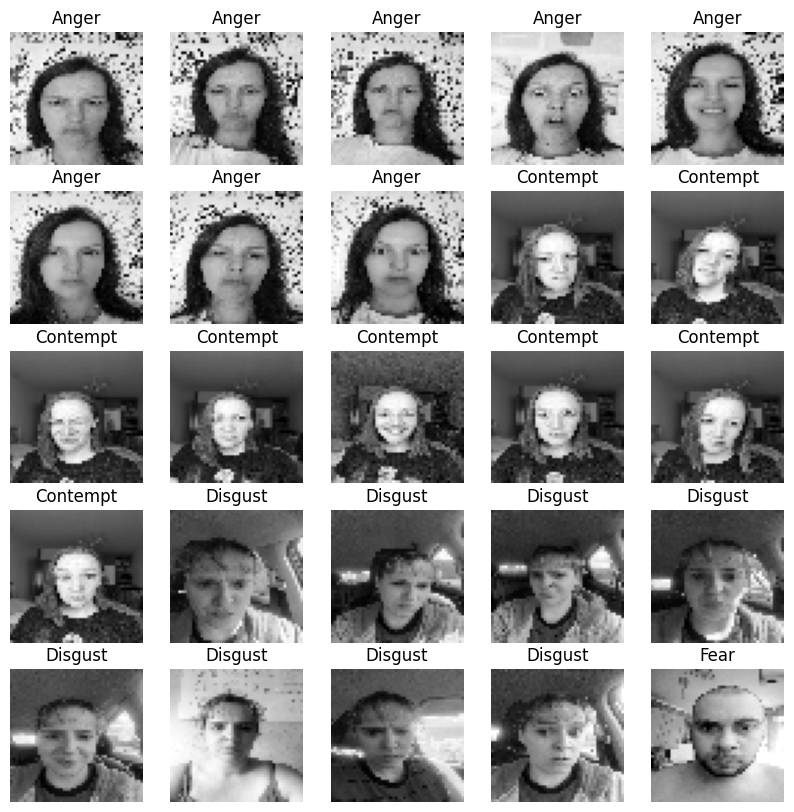

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(EMOTIONS[labels[i]])
    plt.axis('off')
plt.show()

* plt.imshow(images[0], cmap='gray'):Uses the imshow function from matplotlib.pyplot to display the first image in the dataset (images[0]).
* The cmap='gray' argument specifies that the image should be displayed in grayscale colormap. This is useful for visualizing grayscale images.
* plt.title(labels[0]):Sets the title of the plot to the corresponding label of the first image (labels[0]).
This provides information about the emotion or category associated with the displayed image.
* plt.axis('off'): Turns off the axis lines and labels in the plot.
This ensures that the plot doesn't display axis ticks or labels, focusing only on the image.
* plt.show(): Displays the plot containing the sample image and its corresponding label.
This function must be called to actually show the plot on the screen.

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

* **import tensorflow as tf:** Imports the TensorFlow library, an open-source machine learning framework developed by Google. TensorFlow provides tools and libraries for building and training machine learning models, including deep neural networks.
* **from tensorflow.keras import layers, models:** 
From the TensorFlow library, this line imports the layers and models modules from the keras subpackage.
tf.keras is TensorFlow's implementation of the Keras API, which is a high-level neural networks API designed for easy and fast prototyping of deep learning models.
The layers module contains functions and classes for creating different types of layers used in neural networks, such as dense layers, convolutional layers, and recurrent layers.
The models module contains functions and classes for creating and training neural network models, such as sequential models and functional API models.

In [12]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(EMOTIONS), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

C:\Users\suchi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 456ms/step - accuracy: 0.2036 - loss: 2.0794 - val_accuracy: 0.3846 - val_loss: 2.0630
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4412 - loss: 2.0172 - val_accuracy: 0.0769 - val_loss: 2.0434
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.1801 - loss: 1.9236 - val_accuracy: 0.3077 - val_loss: 1.9513
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5562 - loss: 1.7848 - val_accuracy: 0.3846 - val_loss: 1.6769
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5797 - loss: 1.5684 - val_accuracy: 0.9231 - val_loss: 1.2692
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8068 - loss: 1.2798 - val_accuracy: 0.6923 - val_loss: 1.0609
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7937 - loss: 0.9799 - val_accuracy: 1.0000 - val_loss: 0.6598
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8380 - loss: 0.7264 - val_accuracy: 0.6923 - val_loss:

* This code defines a convolutional neural network (CNN) model using TensorFlow's Keras API. Here's a breakdown of each component:
* model = models.Sequential([...]): Initializes a sequential model, which allows for the creation of a linear stack of layers.
* Convolutional Layers: layers.Conv2D(64, (3, 3), activation='relu',
* input_shape=(IMG_SIZE, IMG_SIZE, 1)):
Adds a 2D convolutional layer with 64 filters, each with a kernel size of (3, 3).
The activation function used is ReLU (Rectified Linear Unit).
input_shape=(IMG_SIZE, IMG_SIZE, 1) specifies the shape of the input data, which is (IMG_SIZE, IMG_SIZE, 1) for grayscale images.
* layers.MaxPooling2D(2, 2): Adds a max-pooling layer with a pool size of (2, 2).
This layer reduces the spatial dimensions of the input by taking the maximum value within each 2x2 window.
Flatten Layer:
* layers.Flatten():
Adds a flatten layer to convert the 2D feature maps into a 1D vector, preparing the data for the fully connected layers.
Fully Connected Layers:
* layers.Dense(128, activation='relu'): Adds a fully connected dense layer with 128 neurons and ReLU activation.
This layer learns complex patterns from the flattened feature vectors.
* layers.Dense(len(EMOTIONS), activation='softmax'): Adds the output layer with a number of neurons equal to the number of emotions (len(EMOTIONS)).
The activation function used is softmax, which produces probabilities for each class, representing the likelihood of each emotion category.

* *We use Convolutional Neural Networks (CNNs) in face emotion recognition for several reasons:*
* **Feature Learning:** CNNs automatically learn hierarchical features from facial images, capturing important patterns and details relevant to emotions, such as facial expressions, wrinkles, and eye movements.
* **Spatial Information:** CNNs preserve spatial information through convolutional layers, enabling the network to understand the spatial relationships between facial features crucial for recognizing emotions.
* **Translation Invariance:** CNNs inherently possess translation invariance, allowing them to recognize facial expressions regardless of facial orientation or position in the image.
* **Efficient Representation:** CNNs efficiently represent facial features with shared parameters and local receptive fields, making them well-suited for processing complex visual data like facial images.
* **Performance:** CNNs have demonstrated high accuracy and robustness in facial emotion recognition tasks, achieving state-of-the-art performance compared to traditional methods.
* **Scalability:** CNNs can be trained on large datasets of facial images, enabling the recognition of a wide range of emotions across diverse facial expressions and individuals.











In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 1.0000 - loss: 0.0089
Test accuracy: 1.0


* This code evaluates the trained model on the test set to assess its performance. Here's an explanation of each component:
* test_loss, test_acc = model.evaluate(X_test, y_test): The evaluate method of the model is called with the test set data (X_test) and corresponding labels (y_test).
This method computes the loss and accuracy of the model on the test set.
test_loss stores the computed loss value, and test_acc stores the computed accuracy value.
* print('Test accuracy:', test_acc): Prints the test accuracy of the model.
This provides insight into how well the model generalizes to unseen data.
The accuracy represents the proportion of correctly classified samples in the test set.

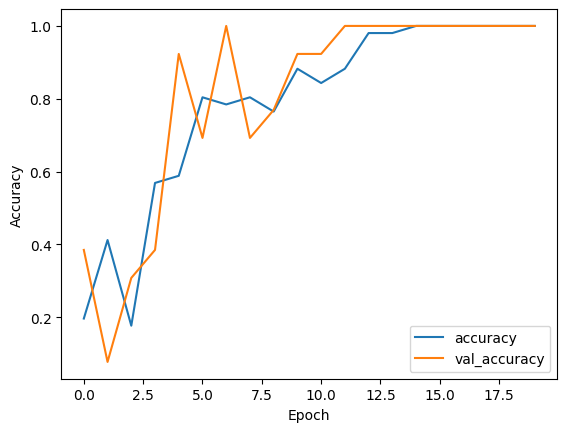

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

* plt.plot(history.history['accuracy'], label='accuracy'): Plots the training accuracy values stored in the accuracy key of the history.history dictionary.
The label parameter specifies the label for the plot, which is displayed in the legend.
* plt.plot(history.history['val_accuracy'], label='val_accuracy'): Plots the validation accuracy values stored in the val_accuracy key of the history.history dictionary.
This curve represents the accuracy of the model on a separate validation set during training.
* plt.xlabel('Epoch'): Sets the label for the x-axis of the plot to "Epoch", indicating the number of training epochs.
* plt.ylabel('Accuracy'): Sets the label for the y-axis of the plot to "Accuracy", representing the accuracy values.
* plt.legend(loc='lower right'): Displays a legend in the lower-right corner of the plot, which helps identify the plotted lines.
The legend entries are based on the label parameters provided in the plt.plot calls.
* plt.show(): Displays the plot containing the training and validation accuracy curves.

In [15]:
# Save the model
model.save('emotion_detection_model.h5')

* Saving the model

In [16]:
from tensorflow.keras.models import load_model

* The line from tensorflow.keras.models import load_model imports the load_model function from the models module within the tensorflow.keras package.
* This function is commonly used to load a previously saved Keras model from disk. After loading the model, you can use it for tasks like making predictions on new data or further training if needed.fic tasks.

 * The from tensorflow.keras.models import load_model statement is used to import the load_model function from the models module within the tensorflow.keras package.
* We use this function to load a previously saved Keras model from disk. Here's why this is useful:
* Model Persistence: After training a machine learning model, we often want to save it to disk so that we can later reuse it without needing to retrain from scratch. The load_model function allows us to load such saved models back into memory.
* Production Deployment: In real-world applications, trained models are often deployed to production environments where they can make predictions on new data. The load_model function enables us to load the trained model into the production environment and use it for inference.
* Experimentation and Collaboration: Machine learning projects often involve multiple iterations of model training and evaluation. By saving and loading models, we can easily share trained models with team members, reproduce results, and continue experimenting with different architectures or hyperparameters.
* Transfer Learning and Fine-Tuning: Pretrained models, especially in deep learning, are commonly used as a starting point for new tasks. The load_model function allows us to load pretrained models and fine-tune them on new data or adapt them for specific tasks.

In [17]:
# Load the saved model
model = load_model('emotion_detection_model.h5')

# Define function to preprocess input image
def preprocess_image(img_path):
    try:
        # Load the image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError("Failed to load image: {}".format(img_path))
        if img.size == 0:
            raise ValueError("Empty image: {}".format(img_path))
        # Resize the image
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        # Normalize the pixel values
        img_normalized = img_resized / 255.0
        # Reshape the image for model input
        img_reshaped = img_normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1)
        return img_reshaped
    except Exception as e:
        print("Error preprocessing image:", e)
        return None



* model = load_model('emotion_detection_model.h5'): Loads the saved Keras model named 'emotion_detection_model.h5' from the disk.
The load_model function returns a Keras model object, which can be used for making predictions on new data.
* def preprocess_image(img_path): Defines a Python function preprocess_image that takes the path of an input image (img_path) as an argument.
This function preprocesses the input image before passing it to the loaded model for prediction.
* Image Preprocessing Steps:
* Loading the Image: Reads the input image using OpenCV's cv2.imread function, specifying the flag cv2.IMREAD_GRAYSCALE to read the image as grayscale.
* Error Handling: Checks if the image loading was successful and raises appropriate exceptions if errors occur.
* Resizing: Resizes the image to the specified size (IMG_SIZE).
* Normalization: Normalizes the pixel values of the resized image to the range [0, 1].
* Reshaping: Reshapes the normalized image into the shape expected by the model ((1, IMG_SIZE, IMG_SIZE, 1)), where 1 represents the batch dimension and 1 is the number of channels (grayscale).
* return img_reshaped: Returns the preprocessed image as a NumPy array with the appropriate shape for model input.
* Exception Handling: Catches any exceptions that occur during image preprocessing and prints an error message.
This code sets up the necessary functions for loading the saved model and preprocessing input images, preparing the system for making predictions on new images using the trained model.

In [18]:
# Provide path to your input image
input_img_path = r"C:\Users\suchi\Desktop\Jupiter\images\images\0\Anger.jpg"

* Provide path to your input image

In [19]:
# Preprocess the input image
input_img = preprocess_image(input_img_path)

* Calls the preprocess_image function with the path of the input image (input_img_path) as an argument.
This function preprocesses the input image by performing resizing, normalization, and reshaping operations.

* The preprocess_image function ensures that the input image is properly formatted and transformed to match the requirements of the model for making predictions.
* Preprocessing steps include loading the image, resizing it to the specified dimensions (IMG_SIZE), normalizing pixel values, and reshaping it to the expected input shape for the model.
* The preprocessed image (input_img) is then ready to be passed to the model for inference or prediction.

In [20]:
# Make prediction using the loaded model
if input_img is not None:
    predictions = model.predict(input_img)

    # Get the predicted emotion label
    predicted_label = EMOTIONS[np.argmax(predictions)]

    # Print the predicted label
    print("Predicted emotion:", predicted_label)
else:
    print("Input image preprocessing failed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Predicted emotion: Anger


* if input_img is not None: Checks if the input image was successfully preprocessed (input_img is not None).
If the input image preprocessing failed, the code skips making predictions and prints an error message.
* predictions = model.predict(input_img): Uses the predict method of the loaded model (model) to make predictions on the preprocessed input image (input_img).
The predict method returns the predicted probabilities for each class.
* predicted_label = EMOTIONS[np.argmax(predictions)]: Calculates the predicted emotion label by finding the index of the maximum probability in the predictions array (np.argmax(predictions)).
The corresponding emotion label is retrieved from the EMOTIONS list using the index.
* print("Predicted emotion:", predicted_label): Prints the predicted emotion label.
* else: Executes if the input image preprocessing failed.
Prints an error message indicating that the input image preprocessing failed.

* **Prediction:** The predict method of the loaded model is used to generate predictions on the preprocessed input image. This is the primary purpose of this code snippet - to obtain the model's prediction for the emotion displayed in the input image.
* **Evaluation:** By making predictions, we can evaluate the model's performance on new, unseen data. This helps in understanding how well the model generalizes to real-world images and whether it can accurately recognize emotions in faces beyond the training data.
* **Application:** The ability to make predictions is essential for deploying machine learning models in real-world applications. In this case, the model can be integrated into applications or systems that require face emotion recognition capabilities, such as emotion-aware user interfaces, sentiment analysis in social media, or human-computer interaction systems.
* **Feedback and Improvement:** By analyzing the model's predictions on various images, developers can gather feedback to identify areas of improvement. For example, if the model consistently misclassifies certain emotions or faces, developers can investigate potential causes and refine the model or the preprocessing steps to enhance its performance.